In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

In [3]:
from ipywidgets import *

In [4]:
import numpy as np

In [5]:
MODS = {'STR': 1.0,
        'DEX': 3.0,
        'CON': 2.0,
        'INT': 4.0,
        'WIS': 2.0,
        'CHA': 3.0}

In [6]:
PROFICIENCY_MOD = 2.0

In [7]:
def _exp_v_die(sides):
    return (sides+1)/2

In [8]:
def _hit_chance(dc, modifier=0.0, sides=20.0):
    chance = (dc + modifier) / sides
    if chance > 1:
        return 1
    elif chance < 0:
        return 0
    return chance

In [9]:
def _spell_attack_hit_chance(armor_class, spell_type='WIZ'):
    if spell_type == 'WIZ':
        spell_mod = MODS['INT']
    elif spell_type == 'WAR':
        spell_mod = MODS['CHA']
    spell_mod += PROFICIENCY_MOD
    chance = _hit_chance(20, spell_mod - armor_class + 1)
    return chance

In [10]:
def _saving_throw(modifier, spell_type='WIZ'):
    if spell_type == 'WIZ':
        spell_mod = MODS['INT']
    elif spell_type == 'WAR':
        spell_mod = MODS['CHA']
    threshold = 8 + spell_mod + PROFICIENCY_MOD - 1
    chance = _hit_chance(float(threshold), modifier= -modifier)
    return chance

In [11]:
def _hellish_rebuke(enemy_mod=0.0, slot_lvl=2, **kwargs):
    hit_chance = _saving_throw(enemy_mod, 'WAR')
    damage = (1+slot_lvl)*_exp_v_die(10.0)
    exp_damage = (hit_chance * damage) + (1 - hit_chance)*(damage/2)
    return exp_damage

In [12]:
def _chromatic_orb(armor_class=10.0, slot_lvl=1, **kwargs):
    damage = (2+slot_lvl) * _exp_v_die(8.0)
    return _spell_attack_hit_chance(armor_class) * damage

In [13]:
def _magic_missile(slot_lvl=1, **kwargs):
    damage = (2+slot_lvl) * (_exp_v_die(4.0) + 1)
    return damage

In [14]:
def _fire_bolt(armor_class=10.0, **kwargs):
    damage = _exp_v_die(10.0)
    return _spell_attack_hit_chance(armor_class) * damage

In [15]:
def _witch_bolt(armor_class=10.0, slot_lvl=1, **kwargs):
    damage = (slot_lvl) * _exp_v_die(12.0)
    return _spell_attack_hit_chance(armor_class) * damage

In [16]:
def _earth_tremor(enemy_mod=0.0, slot_lvl=1, **kwargs):
    hit_chance = _saving_throw(enemy_mod)
    damage = (slot_lvl)*_exp_v_die(6.0)
    return hit_chance*damage

In [17]:
def _thunder_wave(enemy_mod=0, slot_lvl=1, **kwargs):
    hit_chance = _saving_throw(enemy_mod)
    damage = (1+slot_lvl)*_exp_v_die(8.0)
    return hit_chance*damage

In [18]:
def _acid_arrow(armor_class=10, slot_lvl=2, **kwargs):
    damage = (slot_lvl+2) * _exp_v_die(4.0)
    return _spell_attack_hit_chance(armor_class) * damage

In [19]:
def _shatter(enemy_mod=0, slot_lvl=2, **kwargs):
    hit_chance = _saving_throw(enemy_mod)
    damage = (slot_lvl + 1) * _exp_v_die(8.0)
    exp_damage = hit_chance * damage + (1 - hit_chance) * (damage/2)
    return exp_damage

In [43]:
def _fire_ball(enemy_mod=0, slot_lvl=2, **kwargs):
    hit_chance = _saving_throw(enemy_mod)
    print(hit_chance)
    damage = (slot_lvl + 5) * _exp_v_die(6.0)
    print(damage)
    exp_damage = hit_chance * damage + (1 - hit_chance) * (damage/2)
    return exp_damage

In [44]:
_fire_ball(slot_lvl=3)

0.65
28.0


23.099999999999998

In [21]:
def _ice_knife(enemy_mod=0, slot_lvl=2, armor_class=10, **kwargs):
    chance1 = _spell_attack_hit_chance(armor_class)
    damage1 = _exp_v_die(10)
    
    chance2 = _saving_throw(enemy_mod)
    damage2 = slot_lvl * _exp_v_die(6)
    
    exp_damag = chance1 * damage1 + chance2 * damage2
    return exp_damag

In [22]:
def _melfs_acid_arrow(armor_class=10, slot_lvl=2, **kwargs):
    chance = _spell_attack_hit_chance(armor_class)
    damage = (4 + (slot_lvl-1)*2) * _exp_v_die(4)
    return chance * damage

In [23]:
def _scorching_ray(armor_class=10, slot_lvl=2, **kwargs):
    chance = _spell_attack_hit_chance(armor_class)
    damage = (1 + slot_lvl) * chance * 2 * _exp_v_die(6)
    return chance * damage

In [24]:
_hellish_rebuke(slot_lvl=3)

17.6

In [25]:
from collections import OrderedDict

In [26]:
def evaluate_spells(spell_dict, **kwargs):
    calc = []
    for spell, func in spell_dict.items():
        calc.append(func(**kwargs))
    
    return calc

<IPython.core.display.Javascript object>


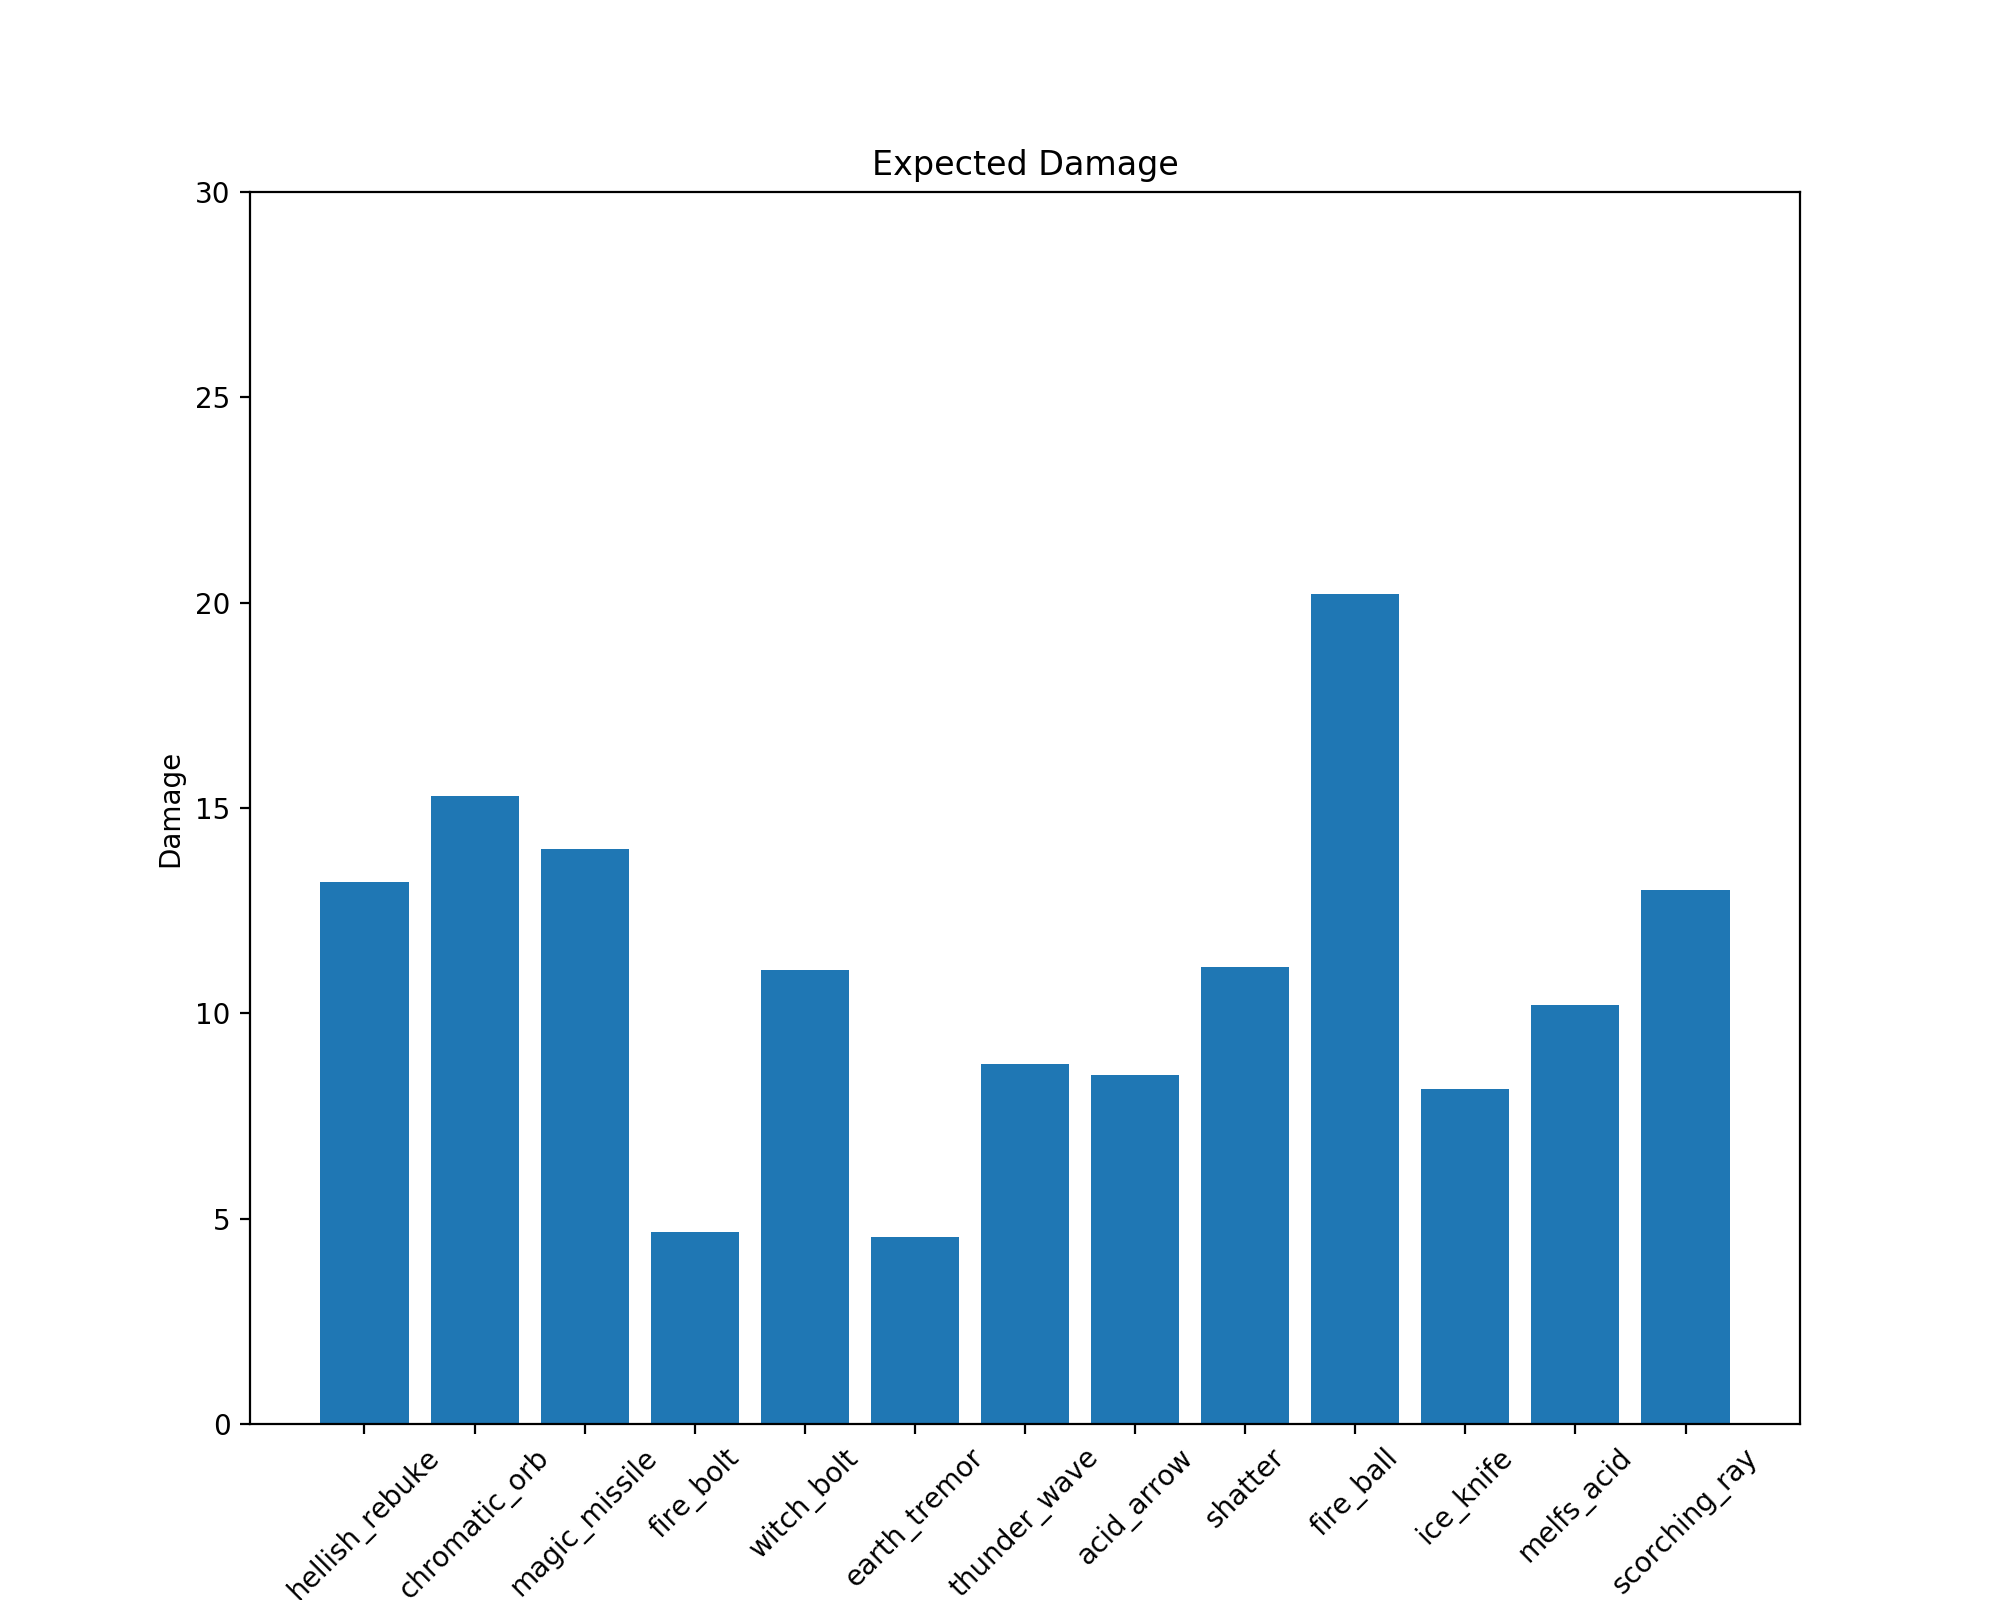

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2VuZW15X21vZCcsIG1heD0xMCwgbWluPS0xMCksIEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3LigKY=


<function __main__.update>

In [27]:
spell_dict = OrderedDict([('hellish_rebuke', _hellish_rebuke),
                          ('chromatic_orb', _chromatic_orb),
                          ('magic_missile', _magic_missile),
                          ('fire_bolt', _fire_bolt),
                          ('witch_bolt', _witch_bolt),
                          ('earth_tremor', _earth_tremor),
                          ('thunder_wave', _thunder_wave),
                          ('acid_arrow', _acid_arrow),
                          ('shatter', _shatter),
                          ('fire_ball', _fire_ball),
                          ('ice_knife', _ice_knife),
                          ('melfs_acid', _melfs_acid_arrow),
                          ('scorching_ray', _scorching_ray)])

fig = plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_ylim(top=30)
bars = ax.bar(spell_dict.keys(), evaluate_spells(spell_dict))
plt.xticks(rotation=45)
plt.title('Expected Damage')
plt.ylabel('Damage')
plt.show()

def update(enemy_mod=0.0, armor_class=10.0, slot_lvl=1):
    global bars
    calcs = evaluate_spells(spell_dict, **locals())
    for bar, calc in zip(bars, calcs):
        bar.set_height(calc)
    plt.show()
    
interact(update, enemy_mod=widgets.IntSlider(min=-10,max=10,step=1,value=0),
                 armor_class=widgets.IntSlider(min=0,max=30,step=1,value=10.0),
                 slot_lvl=widgets.IntSlider(min=1,max=9,step=1,value=2))

In [28]:
import random

In [29]:
random.seed(100)

In [30]:
def roll(sides):
    return random.randint(1,sides)

In [31]:
enemy_mod = 0
spell_lvl = 2
armor_class = 10

In [32]:
range(3)

[0, 1, 2]

In [33]:
def rand_hellish_rebuke():
    global enemy_mod, spell_lvl, armor_class
    dex_saving_throw = roll(20) + enemy_mod
    threshold = 8 + PROFICIENCY_MOD + MODS['CHA']
    damage = sum([roll(10) for i in range(1+spell_lvl)])
    if dex_saving_throw < threshold:
        return damage
    else:
        return damage / 2

In [34]:
def rand_magic_missile():
    global enemy_mod, spell_lvl, armor_class
    darts = range(2+spell_lvl)
    damage = sum([roll(4) + 1 for i in darts])
    return damage

In [35]:
def sample_func(func, times=10000):
    samples = []
    
    for i in range(times):
        samples.append(func())
    
    return samples

In [36]:
def rand_chromatic_orb():
    global enemy_mod, spell_lvl, armor_class
    hit_dc = roll(20) + MODS['INT'] + PROFICIENCY_MOD
    if hit_dc >= armor_class:
        return sum([roll(8) for i in range(2+spell_lvl)])
    else:
        return 0

In [37]:
def rand_fire_ball():
    global enemy_mod, spell_lvl, armor_class
    dex_saving_throw = roll(20) + enemy_mod
    threshold = 8 + PROFICIENCY_MOD + MODS['INT']
    damage = sum([roll(6) for i in range(5+spell_lvl)])
    if dex_saving_throw < threshold:
        return damage
    else:
        return damage / 2

In [38]:
def rand_scorching_ray():
    global enemy_mod, spell_lvl, armor_class
    def single_ray():
        hit_dc = roll(20) + MODS['INT'] + PROFICIENCY_MOD
        if hit_dc >= armor_class:
            return sum([roll(6) for i in range(2)])
        else:
            return 0
    return sum([single_ray() for i in range(spell_lvl+1)])

In [39]:
def plot_cdf(data, ax):
    # sort the data:
    data_sorted = np.sort(data)

    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)

    # plot the sorted data:
    ax.plot(data_sorted, p)

In [40]:
import matplotlib.ticker as ticker

In [41]:
num_bins = 50
sims = 10000

def update(_enemy_mod=0.0, _armor_class=10.0, _slot_lvl=1):
    global enemy_mod, armor_class, spell_lvl
    enemy_mod = _enemy_mod
    armor_class = _armor_class
    spell_lvl = _slot_lvl
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

    sample_list = []
    for spell in (rand_hellish_rebuke, rand_magic_missile, rand_chromatic_orb, rand_fire_ball, rand_scorching_ray):
        sample_list.append(sample_func(spell, times=sims))
        
    ax[0].hist(sample_list, num_bins, label=['hellish_rebuke', 'magic_missile', 'chromatic_orb', 'fire_ball', \
                                             'scorching_ray'])
    ax[0].legend(loc='upper right')
    
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/sims))
    ax[0].yaxis.set_major_formatter(ticks_y)

    for spell_samples in sample_list:
        plot_cdf(spell_samples, ax[1])

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

    
interact(update, _enemy_mod=widgets.IntSlider(min=-10,max=10,step=1,value=0),
                 _armor_class=widgets.IntSlider(min=0,max=30,step=1,value=10.0),
                 _slot_lvl=widgets.IntSlider(min=1,max=9,step=1,value=2))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J19lbmVteV9tb2QnLCBtYXg9MTAsIG1pbj0tMTApLCBJbnRTbGlkZXIodmFsdWU9MTAsIGRlc2PigKY=


<function __main__.update>